In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#load dataset
df = pd.read_csv('travel_data.csv', header = None)

In [6]:
df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.rename(columns = {0:'time', 1:'travellers'}, inplace = True)

In [8]:
df

,time,travellers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
df.describe()

,travellers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        144 non-null    object
 1   travellers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
df['time'].min()

'1949-01'

In [12]:
df['time'].max()

'1960-12'

In [15]:
df['year_month'] = pd.to_datetime(df['time'], format='%Y-%m')

In [16]:
df

,time,travellers,year_month
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01
...,...,...,...
139,1960-08,606,1960-08-01
140,1960-09,508,1960-09-01
141,1960-10,461,1960-10-01
142,1960-11,390,1960-11-01


In [17]:
df.drop('time', axis = 1, inplace = True)

In [18]:
df

,travellers,year_month
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01
...,...,...
139,606,1960-08-01
140,508,1960-09-01
141,461,1960-10-01
142,390,1960-11-01


In [19]:
new_df = df.set_index('year_month')

In [20]:
new_df

,travellers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [21]:
len(df['year_month'].value_counts())

144

In [22]:
df.isnull().sum()

travellers    0
year_month    0
dtype: int64

<AxesSubplot:xlabel='year_month'>

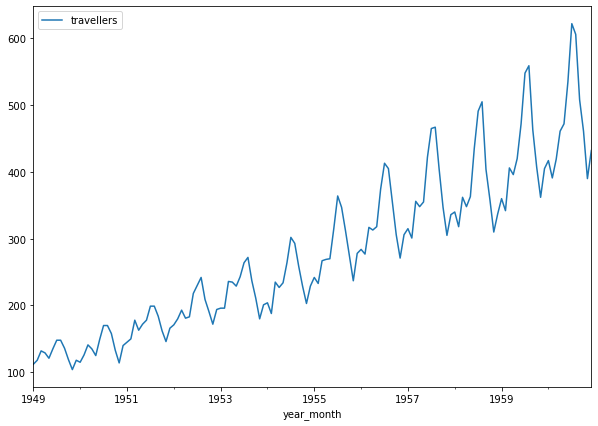

In [23]:
new_df.plot(figsize = (10,7))

/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='travellers', ylabel='Density'>

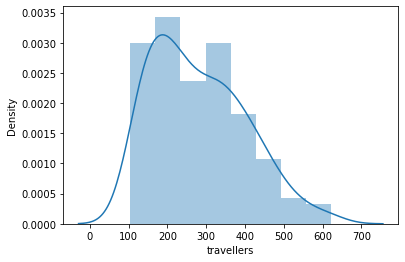

In [24]:
sns.distplot(new_df['travellers'])

<AxesSubplot:ylabel='Density'>

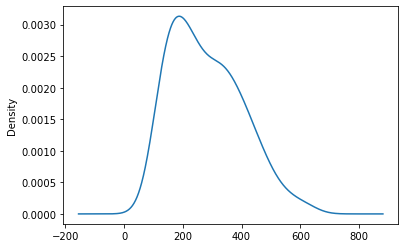

In [25]:
new_df['travellers'].plot(kind = 'kde')

/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_month', ylabel='travellers'>

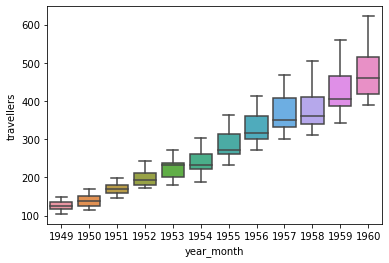

In [26]:
sns.boxplot(new_df['travellers'].index.year, new_df['travellers'], )

In [31]:
#1. Decomposing using statsmodel 

In [32]:
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.ar_model import AR 
from statsmodels.tsa.arima_model import ARMA, ARIMA
# from pyramid.arima import auto_arima 
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from fbprophet import Prophet

from math import sqrt

In [33]:
# decomposing time series

# a.) statsmodels are used
# b.) after decomposition, time series data deconstructs into several components, each component will represent one of the following categories
# c.) we'll be able to see seasonality, trend, residual components of our data

In [34]:
from pylab import rcParams 

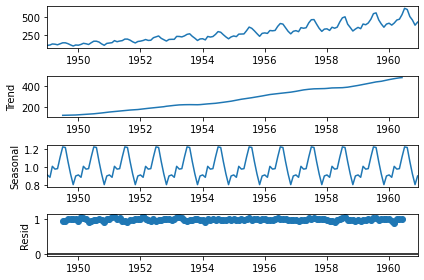

In [35]:
decom = sm.tsa.seasonal_decompose(new_df, model = 'multiplicative')
decom.plot()
plt.show()

In [36]:
# Stationarity 

# stationary -> no movement

# 1. time series is called a stationary graph when its statistical properties like mean, median, mode remain constant over time.
# 2. We assume TS is stationary 
# 3. Bcz in future it has to follow the same trend 
# 4. easier to implement than non stationary time series

# works very well for sales data

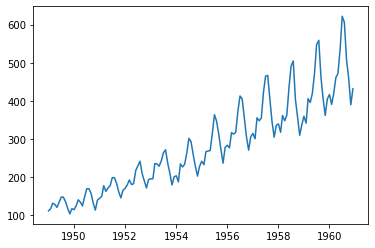

In [37]:
plt.plot(new_df)

In [ ]:
# 3 methods to check stationarity of a graph:

# a. ACF, PACF plots - quick drop-off in correlation after a small amount of lag between points

# b. Plotting Rolling Statistics - plot moving averages or moving variance and see whether it varies with time. 
                                
#        Difference moving average/variance vs average/variance?
#          moving avg/var -> measured for any instant or time period
#          avg/var -> measured for last 12 months

# c. Augmented Dickey-Fuller Test
          
#          Null Hypothesis -> TS is non-stationary   
#          test results - test statistic and some critical values for different CI (Confidence intervals)
         
#          test statistic < critical value  => we reject the null hypothesis  -> TS is stationary

# these 3 methods are used to test whether a time series graph is stationary or not

Data -> EDA, Viz -> TS is stationary or non-stationary (3 tests) => Transformations if TS is non-stationary 

Prediction is also called as Forecasting:  Time Series Forecasting Models
    
    Auto Regression 
    Moving Average
    Autoregressive Moving Average (ARMA)
    Autoregressive Integrated Moving Average (ARIMA)
    Auto ARIMA
    Seasonal Autoregressive Integrated Moving Average (SARIMA)
    Auto SARIMA
    Tuned SARIMA
    SARIMAX

ACF and PACF plots

    ACF -> Auto correlation function
    PACF -> Partial Auto correlation Function
    
    Time series data is stationary -> ACF/PACF plots will show a quick drop-off in correlation
    Data is Non-stationary
    

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib
from matplotlib import pyplot

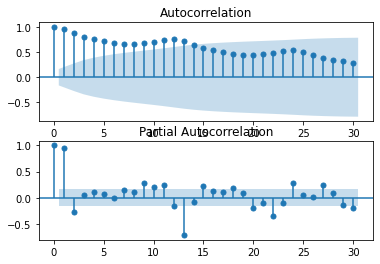

In [62]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(new_df['travellers'], ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(new_df['travellers'], ax=pyplot.gca(), lags = 30)
pyplot.show()

### Plotting Rolling Statistics 
####  if mean and std dev are not same over time then the TS is non-stationary

In [63]:
import pandas as pd

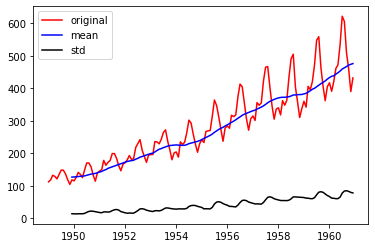

In [64]:
mean = new_df.rolling(12).mean()
std = new_df.rolling(12).std()

plt.plot(new_df, color = 'red', label = 'original')
plt.plot(mean, color = 'blue', label = 'mean')
plt.plot(std, color = 'black', label = 'std')
plt.legend()
plt.show()

### Augmented Dickey-Fuller Test



In [65]:

from statsmodels.tsa.stattools import adfuller

In [66]:
dftest = adfuller(new_df, autolag = 'AIC')
op = pd.Series(dftest[0:4], index = ['Test stat', 'p-val', 'lag', 'observation'])

for k,v in dftest[4].items():
    op['Critical val (%s)'%k] = v
    
print(op)


Test stat               0.815369
p-val                   0.991880
lag                    13.000000
observation           130.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


In [67]:
if op[0] < op[4]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Failed to Reject Ho - Time Series is Non-Stationary


### Transformations

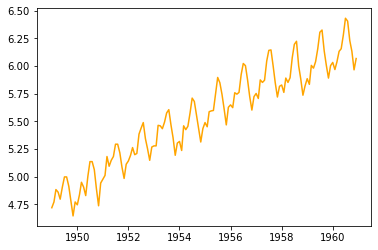

In [68]:
ts_log_transform = np.log(new_df)
plt.plot(ts_log_transform, color = 'orange')

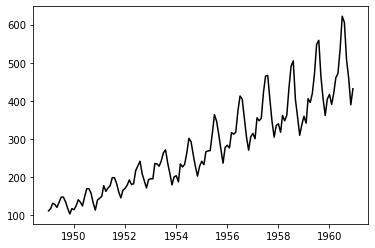

In [69]:
plt.plot(new_df, color = 'black')

### Other transformations: 
    exponential transformation
    box cox tranformations
    square root transformations

In [77]:
moving_avg = new_df.rolling(12).mean()

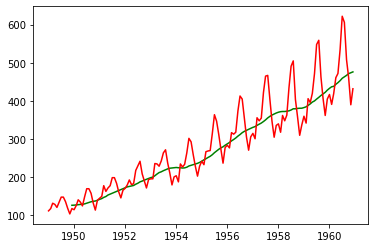

In [78]:
plt.plot(moving_avg, color = 'green')
plt.plot(new_df, color = 'red')

### Differencing

In [103]:
ts_log_transform_diff = ts_log_transform["travellers"] - ts_log_transform["travellers"].shift()

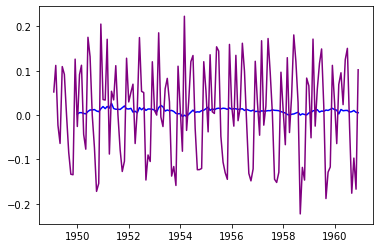

In [104]:
moving_avg_log_diff = ts_log_transform_diff.rolling(12).mean()
plt.plot(moving_avg_log_diff, color = 'blue')
plt.plot(ts_log_transform_diff, color = 'purple')

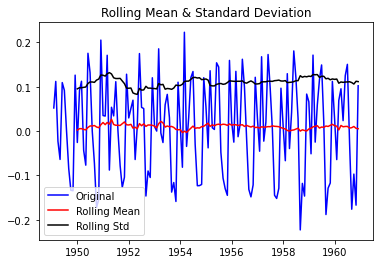

In [105]:
#Determing rolling statistics
rolLmean = ts_log_transform_diff.rolling(12).mean()
rolLstd = ts_log_transform_diff.rolling(12).std()


#Plot rolling statistics:
orig = plt.plot(ts_log_transform_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [106]:
ts_log_transform_diff.dropna(inplace=True)

In [127]:
ts_log_transform_diff

year_month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: travellers, Length: 143, dtype: float64

### Checking if the differentiated log transform is stationary

In [109]:
dftest_logdiff = adfuller(ts_log_transform_diff, autolag = 'AIC')
op_logdiff = pd.Series(dftest_logdiff[0:4], index = ['ADF Test stat', 'p-val', 'lag', 'observation'])

for k,v in dftest[4].items():
    op_logdiff['Critical val (%s)'%k] = v
    
print(op_logdiff)

ADF Test stat          -2.717131
p-val                   0.071121
lag                    14.000000
observation           128.000000
Critical val (1%)      -3.481682
Critical val (5%)      -2.884042
Critical val (10%)     -2.578770
dtype: float64


In [130]:
op_logdiff[0]

-2.717130598388145

In [133]:
op_logdiff[5]

-2.8840418343195267

In [134]:
if op_logdiff[0] < op_logdiff[5]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Failed to Reject Ho - Time Series is Non-Stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test


In [138]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(ts_log_transform_diff)

print('p-value: %f' % kpss_test[1])

p-value: 0.100000


/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Since the p-value >0.05, the TS is Stationary.

In [139]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(ts_log_transform_diff, lags=12)

/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/saneetjawalkar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [142]:
model_fit=model.fit()

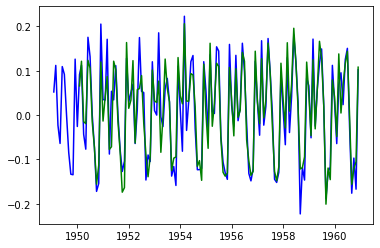

In [145]:
plt.plot(ts_log_transform_diff, color = 'blue')
plt.plot(model_fit.fittedvalues, color='green')
plt.show()

In [150]:
model_fit.fittedvalues.isnull()

year_month
1950-02-01    False
1950-03-01    False
1950-04-01    False
1950-05-01    False
1950-06-01    False
              ...  
1960-08-01    False
1960-09-01    False
1960-10-01    False
1960-11-01    False
1960-12-01    False
Length: 131, dtype: bool

In [152]:
np.nansum((model_fit.fittedvalues-ts_log_transform_diff)**2)

0.21436654564397406